<a href="https://colab.research.google.com/github/RavindrapalRathore/Black-Friday-Sale-Data-Analysis-project/blob/main/black_friday_sales_data_analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib import style
plt.style.use('_classic_test_patch')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataset/black friday sale/train.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.apply(pd.isnull).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
# Filling in Nan's with zero!!
df['Product_Category_1'].fillna(0,inplace=True)
df['Product_Category_2'].fillna(0,inplace=True)
df['Product_Category_3'].fillna(0,inplace=True)

## Purchase according to gender

In [10]:
total_female_purchase=df.loc[df['Gender']=='F','Purchase'].sum()
total_male_purchase=df.loc[df['Gender']=='M','Purchase'].sum()
gen=list(df.Gender.unique())
purchase=[total_female_purchase,total_male_purchase]

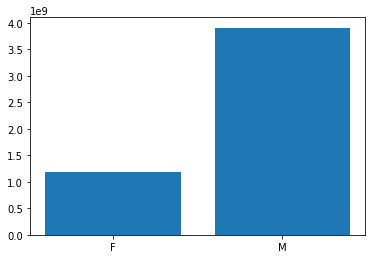

In [11]:
plt.bar(gen,purchase)
plt.show()

## Purchase according to Marital Status

In [12]:
df['Marital_Status'].unique().astype(str)


array(['0', '1'], dtype='<U21')

In [13]:
# assuming 0 as unmarried 
# and 1 as married 
total_purchase_unmarried=df.loc[df['Marital_Status']==0,'Purchase'].sum()
total_purchase_married=df.loc[df['Marital_Status']==1,'Purchase'].sum()
stat=list(df['Marital_Status'].unique().astype(str))
purchase1=[total_purchase_unmarried,total_purchase_married]

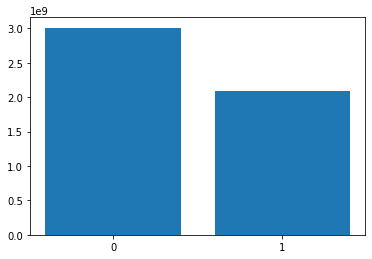

In [14]:
plt.bar(stat,purchase1)
plt.show()

## Analysis by Occupation

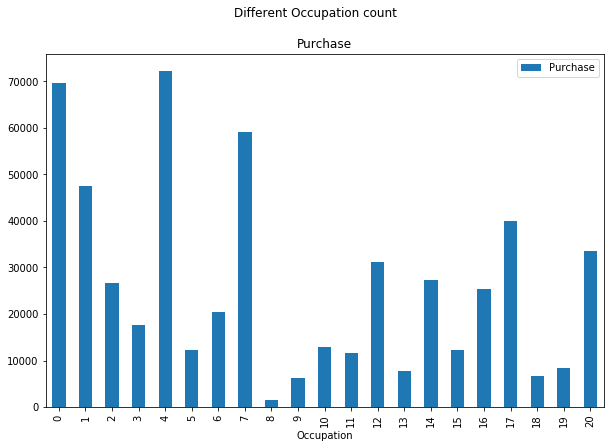

In [15]:
df_occupation=df[['Occupation','Purchase']].groupby('Occupation').count()
df_occupation=df_occupation.sort_values(by='Occupation',ascending=True)
df_occupation.plot(kind='bar',subplots=True,figsize=(10,6.5),title='Different Occupation count')
plt.show()

## Purchase according to occupation

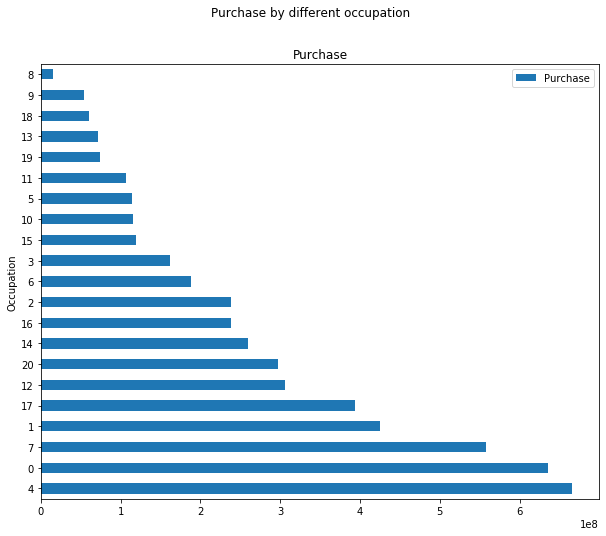

In [16]:
df_occupation1=df[['Occupation','Purchase']].groupby('Occupation').sum()
df_occupation1=df_occupation1.sort_values(by='Purchase',ascending=False)
df_occupation1.plot(kind='barh',figsize=(10,8),subplots=True,title='Purchase by different occupation')
plt.show()

## Purchase by City

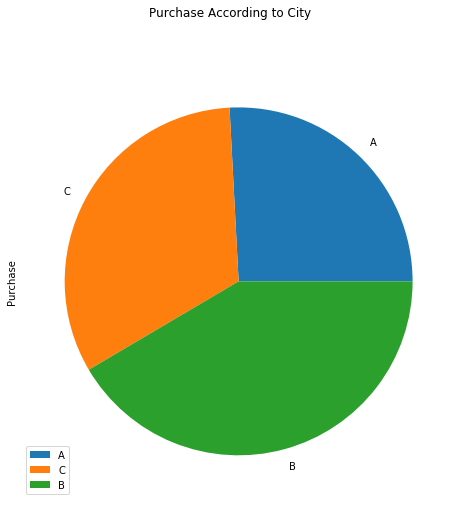

In [17]:
df_city=df[['City_Category','Purchase']].groupby('City_Category').sum()
df_city=df_city.sort_values(by='Purchase',ascending=True)

df_city.plot(kind='pie',subplots=True,figsize=(10,8),title='Purchase According to City')
plt.show()

## Purchase according to age group

In [18]:
df_age_group=df[['Age','Purchase']].groupby('Age').sum()
df_age_group=df_age_group.sort_values(by='Age',ascending=True)

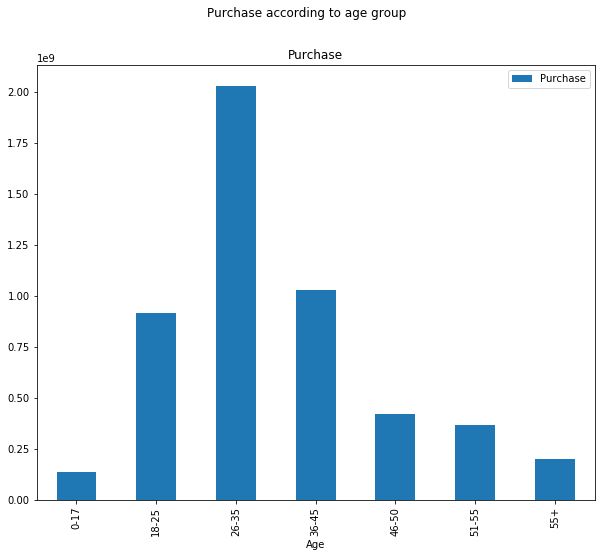

In [19]:
df_age_group.plot(kind='bar',subplots=True,figsize=(10,8),title='Purchase according to age group')
plt.show()

## Product Category analysis

In [20]:
## Product Category 1
df_product1=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
df_product1=df_product1.sort_values(by='Purchase',ascending=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14eea1f910>],
      dtype=object)

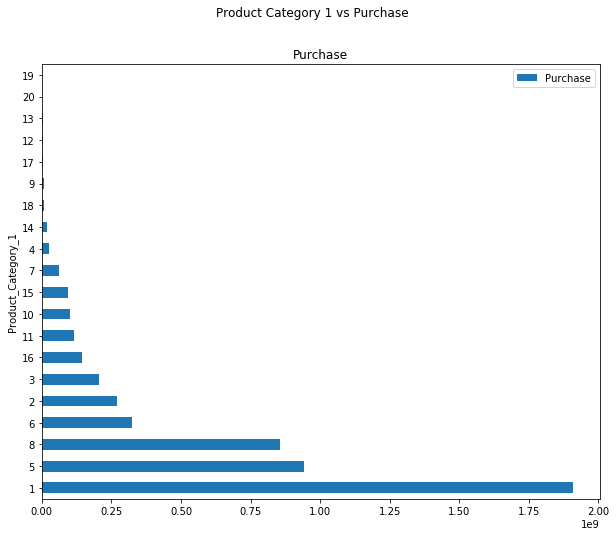

In [21]:
df_product1.plot(kind='barh',figsize=(10,8),subplots=True,title='Product Category 1 vs Purchase')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14eea00e20>],
      dtype=object)

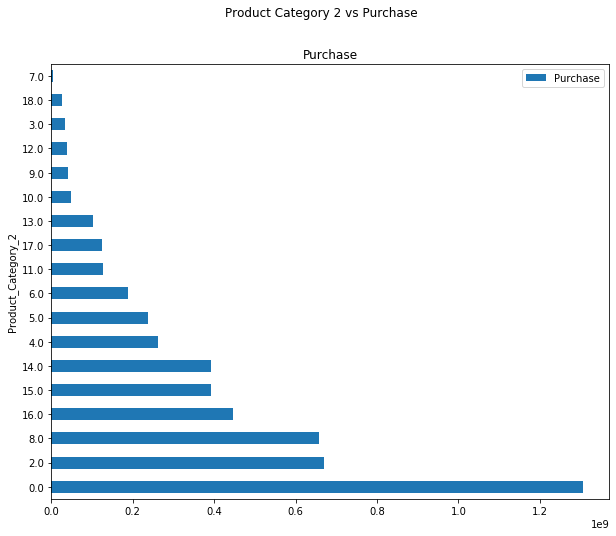

In [22]:
# Product Category 2
df_product2=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
df_product2=df_product2.sort_values(by='Purchase',ascending=False)
df_product2.plot(kind='barh',figsize=(10,8),subplots=True,title='Product Category 2 vs Purchase')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ee80b460>],
      dtype=object)

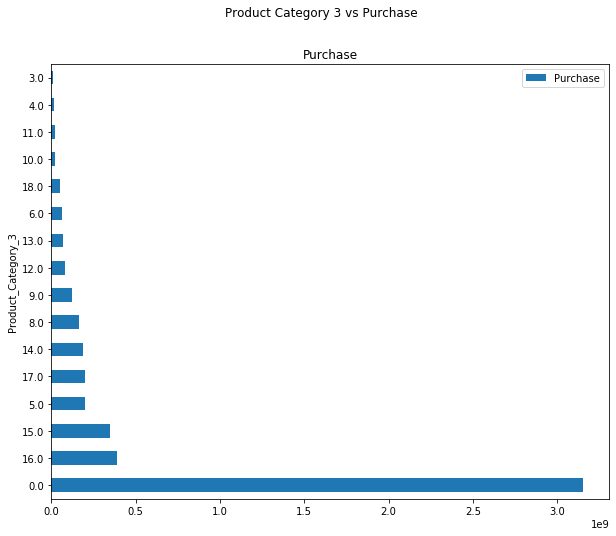

In [24]:
# Product Category 3
df_product3=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
df_product3=df_product3.sort_values(by='Purchase',ascending=False)
df_product3.plot(kind='barh',figsize=(10,8),subplots=True,title='Product Category 3 vs Purchase')

## Top Products by Purchase

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ee78a5e0>],
      dtype=object)

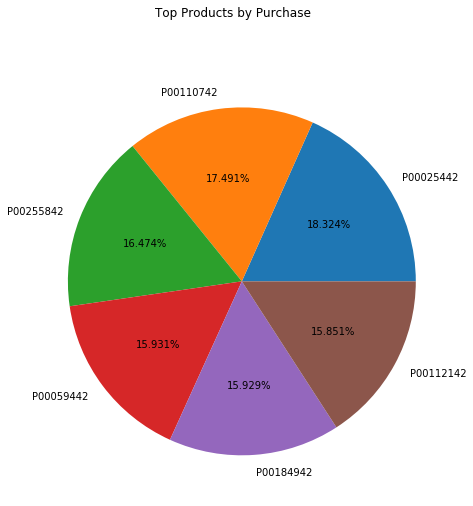

In [25]:
top_product=df[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_product=top_product.sort_values(by='Purchase',ascending=False)
top_product=top_product.head(6)
top_product.plot(kind='pie',subplots=True,title='Top Products by Purchase',legend=False,figsize=(10,8),ylabel=' ',autopct='%1.3f%%')

## Mapping into numerical data

In [26]:
df_cpy=df.copy()

In [27]:
df_cpy['Gender']=pd.factorize(df_cpy.Gender)[0]
df_cpy['Age']=pd.factorize(df_cpy.Age)[0]
df_cpy['City_Category']=pd.factorize(df_cpy.City_Category)[0]
df_cpy['Stay_In_Current_City_Years']=pd.factorize(df_cpy.Stay_In_Current_City_Years)[0]
df_cpy['Product_ID']=pd.factorize(df_cpy.Product_ID)[0]
df_cpy['User_ID']=pd.factorize(df_cpy.User_ID)[0]


In [28]:
df_cpy['Product_Category_1']=pd.factorize(df_cpy.Product_Category_1)[0]
df_cpy['Product_Category_2']=pd.factorize(df_cpy.Product_Category_2)[0]
df_cpy['Product_Category_3']=pd.factorize(df_cpy.Product_Category_3)[0]

In [29]:
df_cpy.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.004389,-0.038275,-0.039948,-0.023348,0.023497,0.003509,0.025181,0.010296,0.002447,0.000739,0.006735
Product_ID,0.004389,1.000000,-0.016938,-0.006908,-0.004188,-0.013383,0.007775,0.013193,0.286762,-0.077515,-0.173713,-0.249081
Gender,-0.038275,-0.016938,1.000000,-0.000777,0.117291,-0.007688,-0.015108,-0.011603,-0.006406,0.021938,0.037288,0.060346
Age,-0.039948,-0.006908,-0.000777,1.000000,-0.040858,0.042006,0.007013,-0.078776,-0.006687,0.004906,0.008081,0.002344
Occupation,-0.023348,-0.004188,0.117291,-0.040858,1.000000,0.005470,-0.010470,0.024280,0.003964,0.008461,0.008824,0.020833
City_Category,0.023497,-0.013383,-0.007688,0.042006,0.005470,1.000000,-0.011205,0.016846,-0.006594,0.011255,0.011226,0.011513
Stay_In_Current_City_Years,0.003509,0.007775,-0.015108,0.007013,-0.010470,-0.011205,1.000000,0.010461,0.003440,-0.001197,-0.004844,-0.007504
Marital_Status,0.025181,0.013193,-0.011603,-0.078776,0.024280,0.016846,0.010461,1.000000,0.011935,-0.002574,-0.010064,-0.000463
Product_Category_1,0.010296,0.286762,-0.006406,-0.006687,0.003964,-0.006594,0.003440,0.011935,1.000000,-0.108763,-0.217742,-0.130190
Product_Category_2,0.002447,-0.077515,0.021938,0.004906,0.008461,0.011255,-0.001197,-0.002574,-0.108763,1.000000,0.238617,0.129176


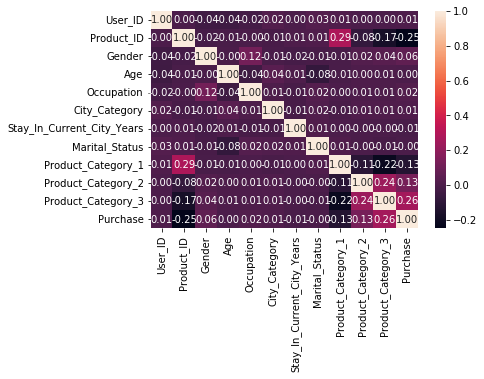

In [30]:
# No strong correlation between features
# so will be difficut to make strong predictions
sns.heatmap(df_cpy.corr(),annot=True,fmt='.2f')

## Model for Purchase prediction

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [32]:
from sklearn import preprocessing

In [33]:
df_cpy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,10,0,0,0,0,0,0,8370
1,0,1,0,0,10,0,0,0,1,1,1,15200
2,0,2,0,0,10,0,0,0,2,0,0,1422
3,0,3,0,0,10,0,0,0,2,2,0,1057
4,1,4,1,1,16,1,1,0,3,0,0,7969


In [34]:
df_cpy.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [35]:
X=df_cpy[[ 'Gender','Product_ID','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
y=df_cpy['Purchase']

In [36]:
# data pre-processing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [37]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [38]:
r2=r2_score(y_test, pred)
r2
## due to poor co-relation between features

0.11849692995243144

## Testing New Model

In [39]:
import xgboost as xgb

In [40]:
model = xgb.XGBRegressor(objective='reg:squarederror')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [42]:
r2=r2_score(y_test,pred)
r2

0.6547030155563517

Now we have a model that has been tested with %65 accuracy that will predict the range of the purchase amount based on the data features. Upvote this notebook if you like this analysis.